In [1]:
from skimage.io import imread
import skimage as sk

image = imread('parrots.jpg')

In [2]:
image.shape

(474, 713, 3)

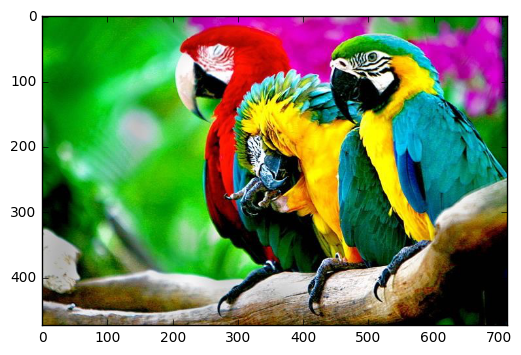

In [3]:
import pylab
%matplotlib inline

pylab.imshow(image)
pylab.show()

In [3]:
image = sk.img_as_float(image)

In [4]:
image[:2]

array([[[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21960784,  0.00392157],
        [ 0.        ,  0.21568627,  0.01568627],
        [ 0.00784314,  0.21568627,  0.03529412]],

       [[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21568627,  0.        ],
        [ 0.        ,  0.20784314,  0.01176471],
        [ 0.        ,  0.20392157,  0.03137255]]])

In [5]:
import pandas as pd
import numpy as np

h, w, rgb = image.shape

features = pd.DataFrame(np.reshape(image, (w*h, rgb)), columns=['r', 'g', 'b'])

In [1]:
from sklearn.cluster import KMeans

kmean = KMeans(init='k-means++', random_state=241)

In [11]:
kmean.fit(features) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [10]:
k1 = kmean.fit(features)
k2 = kmean.fit_predict(features)
np.sum(k2 == k1.labels_) == h*w

True

In [6]:
features['cluster'] = kmean.labels_
features.head()

NameError: name 'kmean' is not defined

In [13]:
kmean.n_clusters

8

In [32]:
features.tail(10)

,r,g,b,cluster
337952,0.011765,0.003922,0.007843,0
337953,0.003922,0.000000,0.023529,0
337954,0.003922,0.000000,0.023529,0
337955,0.003922,0.007843,0.027451,0
337956,0.000000,0.011765,0.027451,0
337957,0.000000,0.007843,0.031373,0
337958,0.000000,0.031373,0.054902,0
337959,0.035294,0.086275,0.121569,0
337960,0.082353,0.145098,0.196078,0
337961,0.086275,0.152941,0.215686,0


In [15]:
mean_img = features.copy()


In [18]:
mean_img.head()

,r,g,b,cluster
0,0.011765,0.490196,0.015686,2
1,0.011765,0.490196,0.015686,2
2,0.007843,0.494118,0.007843,2
3,0.007843,0.494118,0.007843,2
4,0.007843,0.501961,0.011765,2


In [19]:
for i in xrange(kmean.n_clusters):
    mean_img.loc[mean_img.cluster == i, 'r'] = features[features.cluster == i].mean().r
    mean_img.loc[mean_img.cluster == i, 'g'] = features[features.cluster == i].mean().g
    mean_img.loc[mean_img.cluster == i, 'b'] = features[features.cluster == i].mean().b

In [22]:
mean_img.tail(10)

,r,g,b,cluster
337952,0.056355,0.117694,0.053221,0
337953,0.056355,0.117694,0.053221,0
337954,0.056355,0.117694,0.053221,0
337955,0.056355,0.117694,0.053221,0
337956,0.056355,0.117694,0.053221,0
337957,0.056355,0.117694,0.053221,0
337958,0.056355,0.117694,0.053221,0
337959,0.056355,0.117694,0.053221,0
337960,0.056355,0.117694,0.053221,0
337961,0.056355,0.117694,0.053221,0


In [23]:
mean_img = mean_img.drop('cluster', 1)

In [25]:
mean_img.head()

,r,g,b
0,0.097367,0.635438,0.06893
1,0.097367,0.635438,0.06893
2,0.097367,0.635438,0.06893
3,0.097367,0.635438,0.06893
4,0.097367,0.635438,0.06893


In [26]:
mean_img = mean_img.as_matrix()

In [27]:
mean_img

array([[ 0.09736725,  0.6354379 ,  0.0689304 ],
       [ 0.09736725,  0.6354379 ,  0.0689304 ],
       [ 0.09736725,  0.6354379 ,  0.0689304 ],
       ..., 
       [ 0.05635476,  0.11769415,  0.05322146],
       [ 0.05635476,  0.11769415,  0.05322146],
       [ 0.05635476,  0.11769415,  0.05322146]])

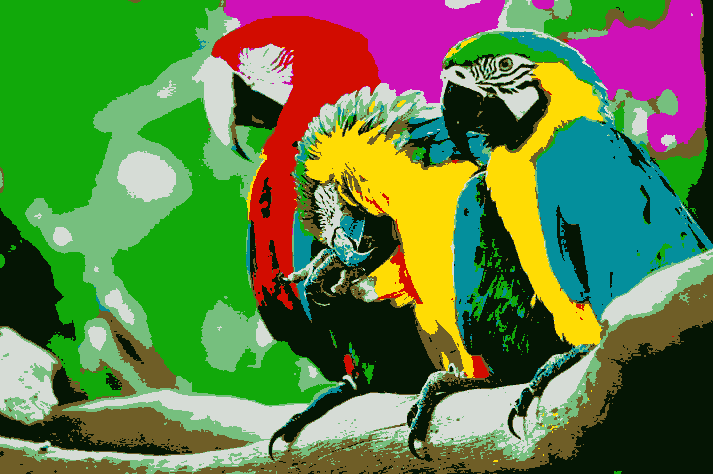

In [16]:
from scipy.misc import toimage
img = toimage(mean_img.reshape(h, w, rgb))
img

In [28]:
median_img = features.copy()
for i in xrange(kmean.n_clusters):
    median_img.loc[median_img.cluster == i, 'r'] = features[features.cluster == i].median().r
    median_img.loc[median_img.cluster == i, 'g'] = features[features.cluster == i].median().g
    median_img.loc[median_img.cluster == i, 'b'] = features[features.cluster == i].median().b

In [29]:
median_img.head()

,r,g,b,cluster
0,0.058824,0.643137,0.023529,2
1,0.058824,0.643137,0.023529,2
2,0.058824,0.643137,0.023529,2
3,0.058824,0.643137,0.023529,2
4,0.058824,0.643137,0.023529,2


In [30]:
median_img = median_img.drop('cluster', 1).as_matrix()

In [31]:
median_img

array([[ 0.05882353,  0.64313725,  0.02352941],
       [ 0.05882353,  0.64313725,  0.02352941],
       [ 0.05882353,  0.64313725,  0.02352941],
       ..., 
       [ 0.01568627,  0.07058824,  0.01568627],
       [ 0.01568627,  0.07058824,  0.01568627],
       [ 0.01568627,  0.07058824,  0.01568627]])

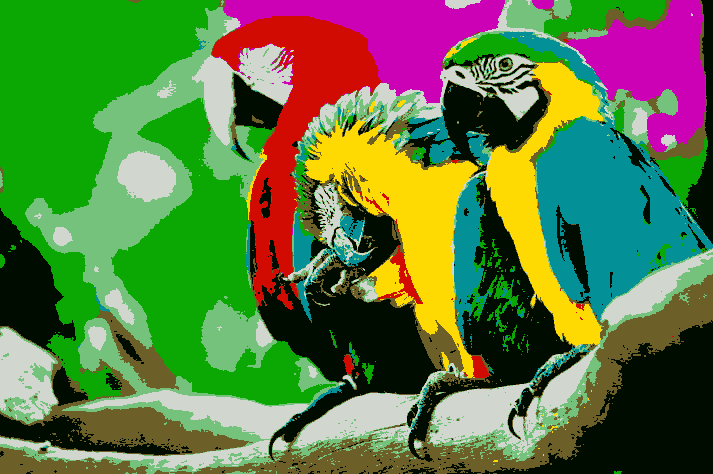

In [22]:
img = toimage(median_img.reshape(h, w, rgb))
img

In [6]:
image = image.reshape(h*w, rgb)
print image

[[ 0.01176471  0.49019608  0.01568627]
 [ 0.01176471  0.49019608  0.01568627]
 [ 0.00784314  0.49411765  0.00784314]
 ..., 
 [ 0.03529412  0.08627451  0.12156863]
 [ 0.08235294  0.14509804  0.19607843]
 [ 0.08627451  0.15294118  0.21568627]]


In [11]:
# peak signal-to-noise ratio
def psnr_func(image, mean_img):
    mse = np.mean(np.power((image - mean_img.reshape(h*w,rgb)), 2))
    max_pixel = np.array([np.max(np.transpose(image)[i]) for i in xrange(rgb)])[0]
    psnr = 10 * np.log10(np.power(max_pixel, 2)/mse) 
    return psnr

In [47]:
from sklearn.cluster import KMeans


def cluster(features, n_clusters):
    kmean = KMeans(n_clusters = n_clusters, init='k-means++', random_state=241)
    kmean.fit(features)    
    features['cluster'] = kmean.labels_
    
    mean_img = features.copy()
    median_img = features.copy()

    def mean_image(mean_img, features, n_clusters):
        for i in xrange(n_clusters):
            mean_img.loc[mean_img.cluster == i, 'r'] = features[features.cluster == i].mean().r
            mean_img.loc[mean_img.cluster == i, 'g']  = features[features.cluster == i].mean().g
            mean_img.loc[mean_img.cluster == i, 'b']  = features[features.cluster == i].mean().b
        return mean_img.drop('cluster', 1).as_matrix().reshape((h, w, rgb))
    
    mean_img = mean_image(mean_img, features, n_clusters)
    
    def median_image(median_img,features, n_clusters):
        for i in xrange(n_clusters):
            median_img.loc[median_img.cluster == i, 'r'] = features[features.cluster == i].median().r
            median_img.loc[median_img.cluster == i, 'g'] = features[features.cluster == i].median().g
            median_img.loc[median_img.cluster == i, 'b'] = features[features.cluster == i].median().b
        return median_img.drop('cluster', 1).as_matrix().reshape((h, w, rgb))

    median_img = median_image(median_img, features, n_clusters)
    
    return mean_img, median_img

In [46]:
for j in xrange(11, 21):
    print 'Number of cluster', j
    mean_img, median_img = cluster(features, j)
    psnr_mean, psnr_median = psnr_func(image, mean_img), psnr_func(image, median_img)
    psnr_mean = psnr_func(image, mean_img)
    print psnr_mean, psnr_median
    
    if psnr_mean > 20 or psnr_median > 20 :
        print j
        break

 Number of cluster 11
before           r         g         b  cluster
0  0.011765  0.490196  0.015686        6
1  0.011765  0.490196  0.015686        6
2  0.007843  0.494118  0.007843        6
3  0.007843  0.494118  0.007843        6
4  0.007843  0.501961  0.011765        6
5  0.011765  0.505882  0.011765        6
6  0.007843  0.513725  0.015686        6
7  0.003922  0.517647  0.007843        6
8  0.007843  0.521569  0.011765        6
9  0.000000  0.525490  0.011765        6
20.1788075422 19.9060725952
11


In [48]:
with open('q1.txt', 'w') as f:
    f.write(str(j))
f.close()